In [38]:
import pandas as pd
import numpy as np
import seaborn as sns #data visualization
import matplotlib.pyplot as plt #data visualization

%matplotlib inline

import warnings #so that we dont get any warning while running the code
warnings.filterwarnings('ignore')

In [5]:
ipl = pd.read_csv('ipl_2022_dataset.csv')
ipl.head()

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


# Data Cleaning

In [9]:
ipl.shape

(633, 8)

In [10]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       633 non-null    int64  
 1   Player           633 non-null    object 
 2   Base Price       633 non-null    object 
 3   TYPE             633 non-null    object 
 4   COST IN ₹ (CR.)  237 non-null    float64
 5   Cost IN $ (000)  237 non-null    float64
 6   2021 Squad       199 non-null    object 
 7   Team             633 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 39.7+ KB


In [11]:
ipl.drop('Unnamed: 0', axis =1, inplace = True)

In [12]:
ipl.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [15]:
# checking total number of null values that are present in each column of dataset
ipl.isnull().sum()

Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)    396
Cost IN $ (000)    396
2021 Squad         434
Team                 0
dtype: int64

In [17]:
ipl[ipl['Cost IN $ (000)'].isnull()] #checking rows that have cost in $ or null

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
237,Suresh Raina,2 Cr,BATTER,NaN,NaN,CSK,Unsold
238,Steve Smith,2 Cr,BATTER,NaN,NaN,DC,Unsold
239,Shakib Al Hasan,2 Cr,ALL-ROUNDER,NaN,NaN,KKR,Unsold
240,Amit Mishra,1.5 Cr,BOWLER,NaN,NaN,DC,Unsold
241,Adil Rashid,2 Cr,BOWLER,NaN,NaN,PBKS,Unsold
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold


In [18]:
#filling NA values with 0
ipl['COST IN ₹ (CR.)'] = ipl['COST IN ₹ (CR.)'].fillna(0)
ipl['Cost IN $ (000)'] = ipl['Cost IN $ (000)'].fillna(0)

In [19]:
ipl[ipl['2021 Squad'].isnull()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
6,Yash Dayal,20 Lakh,BOWLER,3.2,416.0,NaN,Gujarat Titans
9,Abhinav Sadarangani,20 Lakh,BATTER,2.6,338.0,NaN,Gujarat Titans
10,Matthew Wade,2 Cr,WICKETKEEPER,2.4,312.0,NaN,Gujarat Titans
11,Alzarri Joseph,75 Lakh,BOWLER,2.4,312.0,NaN,Gujarat Titans
17,Varun Aaron,50 Lakh,BOWLER,0.5,65.0,NaN,Gujarat Titans
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold


In [21]:
ipl['2021 Squad'] = ipl['2021 Squad'].fillna("Not Participated")

In [22]:
ipl.isnull().sum()

Player             0
Base Price         0
TYPE               0
COST IN ₹ (CR.)    0
Cost IN $ (000)    0
2021 Squad         0
Team               0
dtype: int64

In [24]:
teams = ipl[ipl['COST IN ₹ (CR.)']>0]['Team'].unique() #slicing data frame all the rows where cost in ruppe is greater than 0 and is unique
teams

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad'], dtype=object)

In [27]:
ipl['status'] = ipl['Team'].replace(teams,'sold') #adding new column that will have values sold and unsold

In [28]:
ipl

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold
...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,Not Participated,Unsold,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold


In [29]:
ipl[ipl['Player'].duplicated(keep = False)]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status
62,Lalit Yadav,20 Lakh,ALL-ROUNDER,0.65,84.5,DC,Delhi Capitals,sold
240,Amit Mishra,1.5 Cr,BOWLER,0.00,0.0,DC,Unsold,Unsold
499,Amit Mishra,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold
518,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold
530,Lalit Yadav,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold
537,Shubham Singh,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold
544,Shubham Singh,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold
569,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold


In [30]:
#how many players have participated in 2022 IPL auction
ipl.shape[0]

633

In [33]:
#how many types of players have participated?
types = ipl["TYPE"].value_counts()
types.reset_index()

,index,TYPE
0,ALL-ROUNDER,242
1,BOWLER,215
2,BATTER,112
3,WICKETKEEPER,64


In [34]:
#Data Visualization

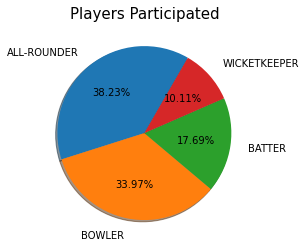

In [35]:
plt.pie(types.values, labels= types.index, labeldistance=1.2, autopct= '%1.2f%%', shadow=True, startangle=60)
plt.title('Players Participated', fontsize = 15)
plt.show()

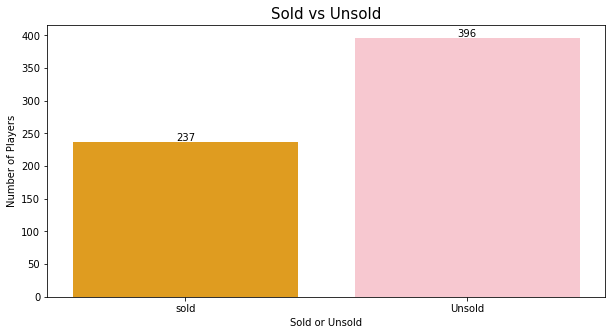

In [42]:
#plyers sold and unsold using bar graph

plt.figure(figsize=(10,5))
fig =sns.countplot(ipl['status'],palette=['Orange','Pink'])
plt.xlabel('Sold or Unsold')
plt.ylabel('Number of Players')
plt.title('Sold vs Unsold', fontsize =15)
plt.plot()

for p in fig.patches:
    fig.annotate(format(p.get_height(), '.0f'), (p.get_x() +
    p.get_width()/2., p.get_height()), ha = 'center', va = 'center',
    xytext = (0,4), textcoords = 'offset points')

In [43]:
ipl.groupby('status')['Player'].count()

status
Unsold    396
sold      237
Name: Player, dtype: int64

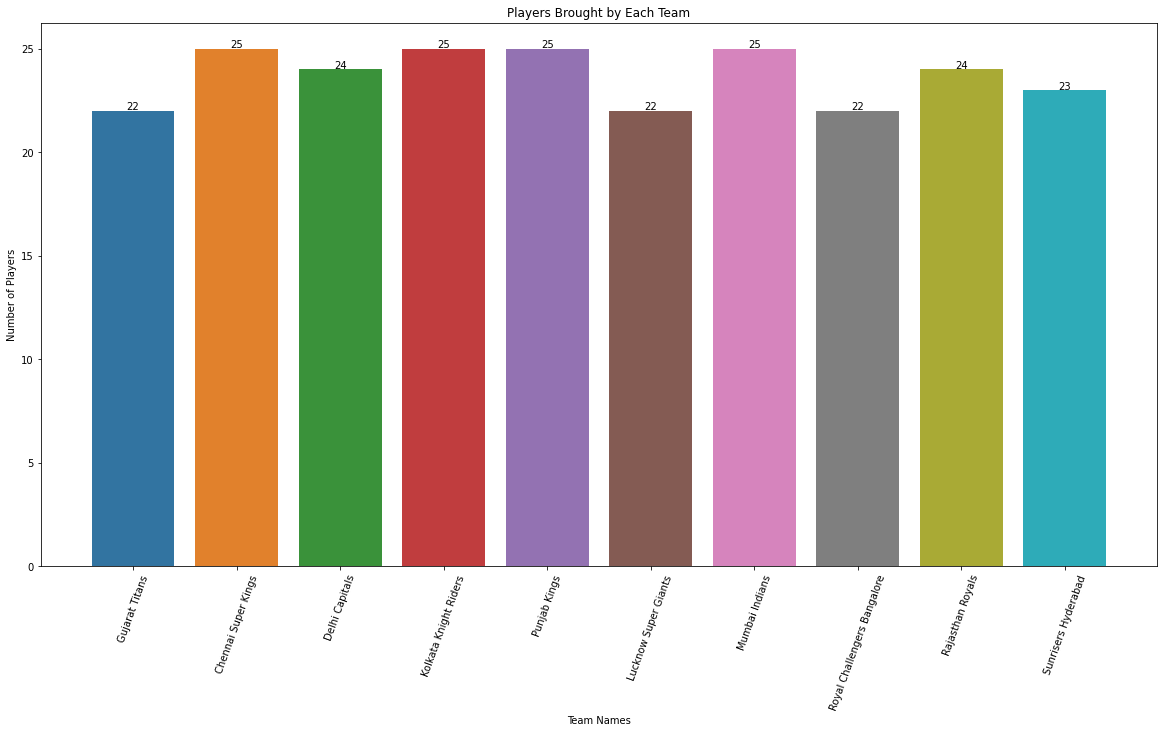

In [45]:
#total number of players brought by each team

plt.figure(figsize=(20,10))
fig = sns.countplot(ipl[ipl['Team']!='Unsold']['Team'])
plt.xlabel('Team Names')
plt.ylabel('Number of Players')
plt.title('Players Brought by Each Team', fontsize=12)
plt.xticks(rotation=70)
plt.plot()

for p in fig.patches:
    fig.annotate(format(p.get_height(), '.0f'), (p.get_x() +
    p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0,4),
    textcoords = 'offset points')

In [46]:
ipl['retention'] = ipl['Base Price']

In [47]:
ipl['retention'].replace(['2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '75 Lakh',
                         '50 Lakh', '30 Lakh', '1.5 Cr'], 'From Auction', inplace = True)

In [50]:
#treating base price

ipl['Base Price'].replace('Draft Pick', 0, inplace = True)

In [52]:
ipl['base_price_unit'] = ipl['Base Price'].apply(lambda x: str(x).split(' ')[-1])
ipl['base_price'] = ipl['Base Price'].apply(lambda x: str(x).split(' ')[0])

In [54]:
ipl['base_price'].replace('Retained', 0, inplace=True)

In [55]:
ipl.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
0,Rashid Khan,0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold,Draft Pick,0,0
1,Hardik Pandya,0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold,Draft Pick,0,0
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold,From Auction,Cr,2
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold,From Auction,Lakh,40
4,Shubman Gill,0,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold,Draft Pick,0,0


In [57]:
#total players retained and brought
ipl.groupby(['Team', 'retention'])['retention'].count()[:-1]

Team                         retention   
Chennai Super Kings          From Auction    21
                             Retained         4
Delhi Capitals               From Auction    20
                             Retained         4
Gujarat Titans               Draft Pick       3
                             From Auction    19
Kolkata Knight Riders        From Auction    21
                             Retained         4
Lucknow Super Giants         Draft Pick       3
                             From Auction    19
Mumbai Indians               From Auction    21
                             Retained         4
Punjab Kings                 From Auction    23
                             Retained         2
Rajasthan Royals             From Auction    21
                             Retained         3
Royal Challengers Bangalore  From Auction    19
                             Retained         3
Sunrisers Hyderabad          From Auction    20
                             Retained         

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Gujarat Titans'),
  Text(1, 0, 'Chennai Super Kings'),
  Text(2, 0, 'Delhi Capitals'),
  Text(3, 0, 'Kolkata Knight Riders'),
  Text(4, 0, 'Punjab Kings'),
  Text(5, 0, 'Lucknow Super Giants'),
  Text(6, 0, 'Mumbai Indians'),
  Text(7, 0, 'Royal Challengers Bangalore'),
  Text(8, 0, 'Rajasthan Royals'),
  Text(9, 0, 'Sunrisers Hyderabad')])

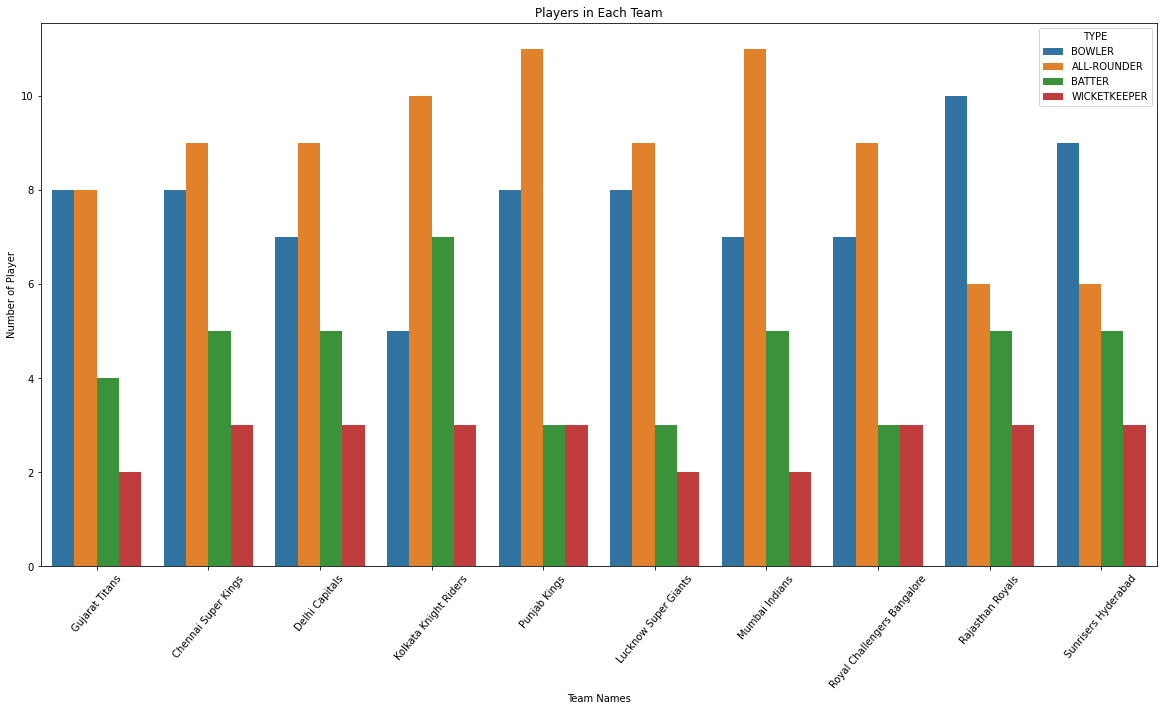

In [60]:
plt.figure(figsize =(20,10))
fig = sns.countplot(ipl[ipl['Team']!= 'Unsold']['Team'], hue=ipl['TYPE'])
plt.title('Players in Each Team')
plt.xlabel('Team Names')
plt.ylabel('Number of Player')
plt.xticks(rotation=50)

In [63]:
 #Highest amount spent on a single player by each team
    
ipl[ipl['retention']=='From Auction'].groupby(['Team'])['COST IN ₹ (CR.)'].max()[:-1].sort_values(ascending = False)

Team
Mumbai Indians                 15.25
Chennai Super Kings            14.00
Kolkata Knight Riders          12.25
Punjab Kings                   11.50
Delhi Capitals                 10.75
Royal Challengers Bangalore    10.75
Sunrisers Hyderabad            10.75
Gujarat Titans                 10.00
Lucknow Super Giants           10.00
Rajasthan Royals               10.00
Name: COST IN ₹ (CR.), dtype: float64

In [69]:
#player retained at maximum price

ipl[ipl['retention']== 'Retained'].sort_values(by = 'COST IN ₹ (CR.)', ascending = False).head(1) 

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
22,Ravindra Jadeja,Retained,ALL-ROUNDER,16.0,2080.0,CSK,Chennai Super Kings,sold,Retained,Retained,0


In [74]:
# Top 5 Bowlers

ipl[(ipl['retention']=='From Auction') & (ipl["TYPE"]=='ALL-ROUNDER')].sort_values(by='COST IN ₹ (CR.)', ascending = False)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),Prev_team,Team,status,retention,base_price_unit,base_price
97,Liam Livingstone,1 Cr,ALL-ROUNDER,11.50,1495.0,RR,Punjab Kings,sold,From Auction,Cr,1
170,Wanindu Hasaranga,1 Cr,ALL-ROUNDER,10.75,1397.5,RCB,Royal Challengers Bangalore,sold,From Auction,Cr,1
171,Harshal Patel,2 Cr,ALL-ROUNDER,10.75,1397.5,RCB,Royal Challengers Bangalore,sold,From Auction,Cr,2
99,Shahrukh Khan,40 Lakh,ALL-ROUNDER,9.00,1170.0,PBKS,Punjab Kings,sold,From Auction,Lakh,40
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.00,1170.0,RR,Gujarat Titans,sold,From Auction,Lakh,40
...,...,...,...,...,...,...,...,...,...,...,...
492,Ninad Rathva,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold,From Auction,Lakh,20
493,Shoun Roger,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold,From Auction,Lakh,20
504,Mark Adnair,50 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold,From Auction,Lakh,50
505,Hilton Cartwright,50 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold,From Auction,Lakh,50


In [75]:
ipl = ipl.rename(columns={'2021 Squad': 'Prev_team'})

In [76]:
unsold_players = ipl[(ipl.Prev_team != 'Not Participated')
                    &(ipl.Team == 'Unsold')][['Player', 'Prev_team']]

In [77]:
print(unsold_players)

                      Player Prev_team
237             Suresh Raina       CSK
238              Steve Smith        DC
239          Shakib Al Hasan       KKR
240              Amit Mishra        DC
241              Adil Rashid      PBKS
242              Imran Tahir       CSK
243            Mujeeb Zadran       SRH
244               Adam Zampa       RCB
245            Rajat Patidar       RCB
246     Mohammed Azharuddeen       RCB
249             M. Siddharth        DC
252              Dawid Malan      PBKS
253              Eoin Morgan       KKR
254        Cheteshwar Pujara       CSK
255           Saurabh Tiwary        MI
257            Ishant Sharma        DC
259            Piyush Chawla        MI
260           Tabraiz Shamsi        RR
262              Sachin Baby       RCB
267              Virat Singh       SRH
269              Akash Singh        RR
273               Chris Lynn        MI
276            George Garton       RCB
288               Andrew Tye        RR
289          Sandeep Warr